In [1]:

from google.colab import files
uploaded = files.upload()


Saving bank.csv to bank.csv


In [2]:

import pandas as pd
df = pd.read_csv('bank.csv')
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Shape: (11162, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
None

Missing values:
age          0
job          0
marital      0
education    0
default   

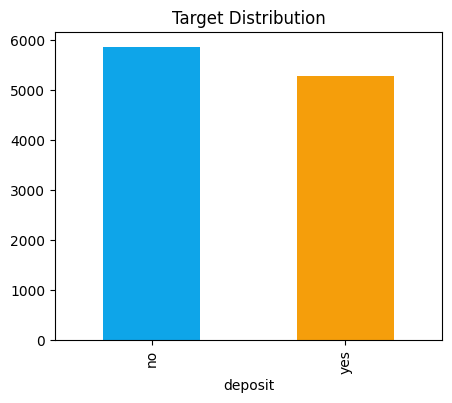


Numeric: ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']
Categorical: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

=== GINI ===
Accuracy: 0.6223, ROC-AUC: 0.6206, PR-AUC: 0.5505
              precision    recall  f1-score   support

           0       0.64      0.65      0.64      1762
           1       0.60      0.59      0.60      1587

    accuracy                           0.62      3349
   macro avg       0.62      0.62      0.62      3349
weighted avg       0.62      0.62      0.62      3349



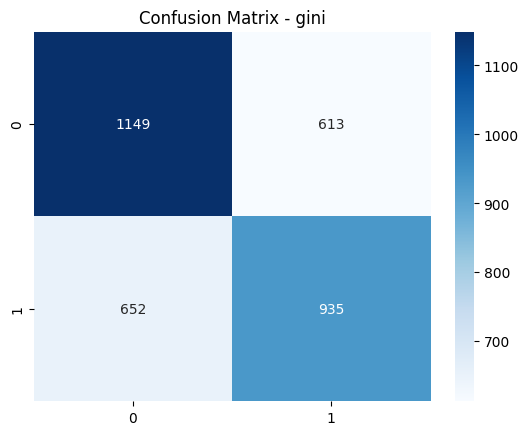


=== ENTROPY ===
Accuracy: 0.6277, ROC-AUC: 0.6266, PR-AUC: 0.5548
              precision    recall  f1-score   support

           0       0.65      0.65      0.65      1762
           1       0.61      0.61      0.61      1587

    accuracy                           0.63      3349
   macro avg       0.63      0.63      0.63      3349
weighted avg       0.63      0.63      0.63      3349



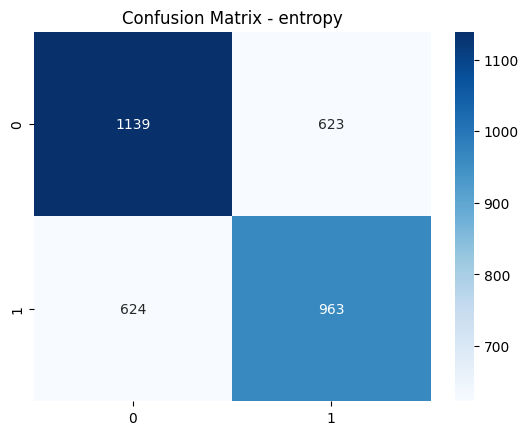


=== LOG_LOSS ===
Accuracy: 0.6277, ROC-AUC: 0.6266, PR-AUC: 0.5548
              precision    recall  f1-score   support

           0       0.65      0.65      0.65      1762
           1       0.61      0.61      0.61      1587

    accuracy                           0.63      3349
   macro avg       0.63      0.63      0.63      3349
weighted avg       0.63      0.63      0.63      3349



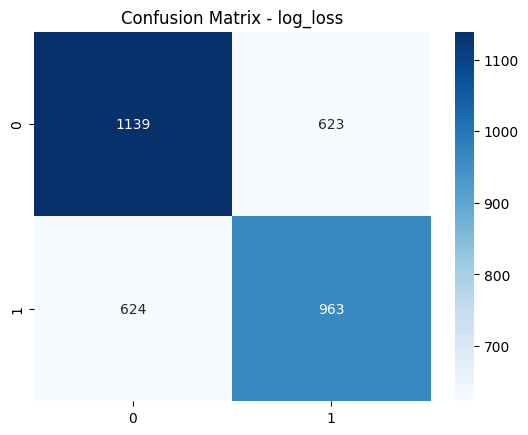


Top 15 Features:
balance                0.210031
age                    0.134573
day                    0.121799
poutcome_success       0.066105
campaign               0.059339
pdays                  0.041855
contact_unknown        0.035049
job_blue-collar        0.020301
job_technician         0.017651
education_tertiary     0.015336
previous               0.014829
education_secondary    0.013836
housing_no             0.013827
month_apr              0.013136
job_services           0.012490
dtype: float64


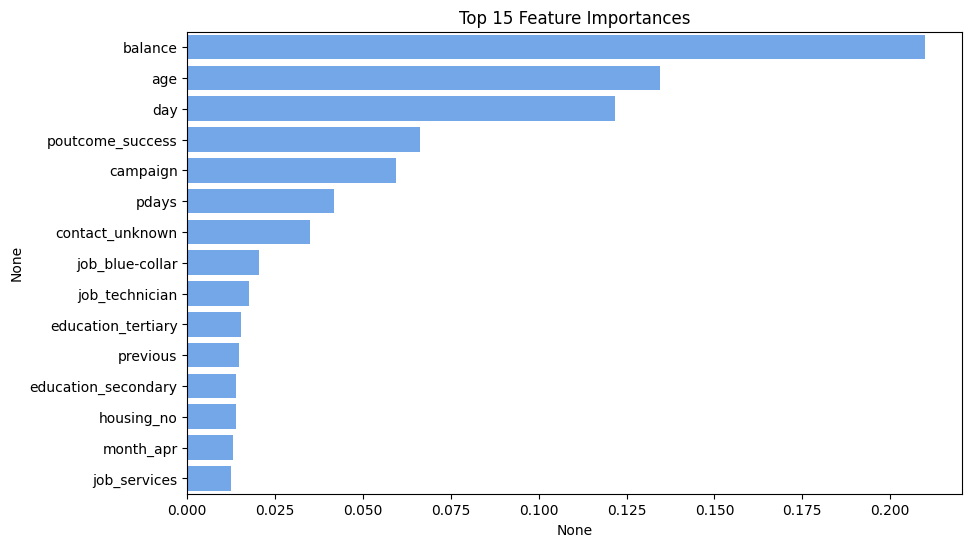

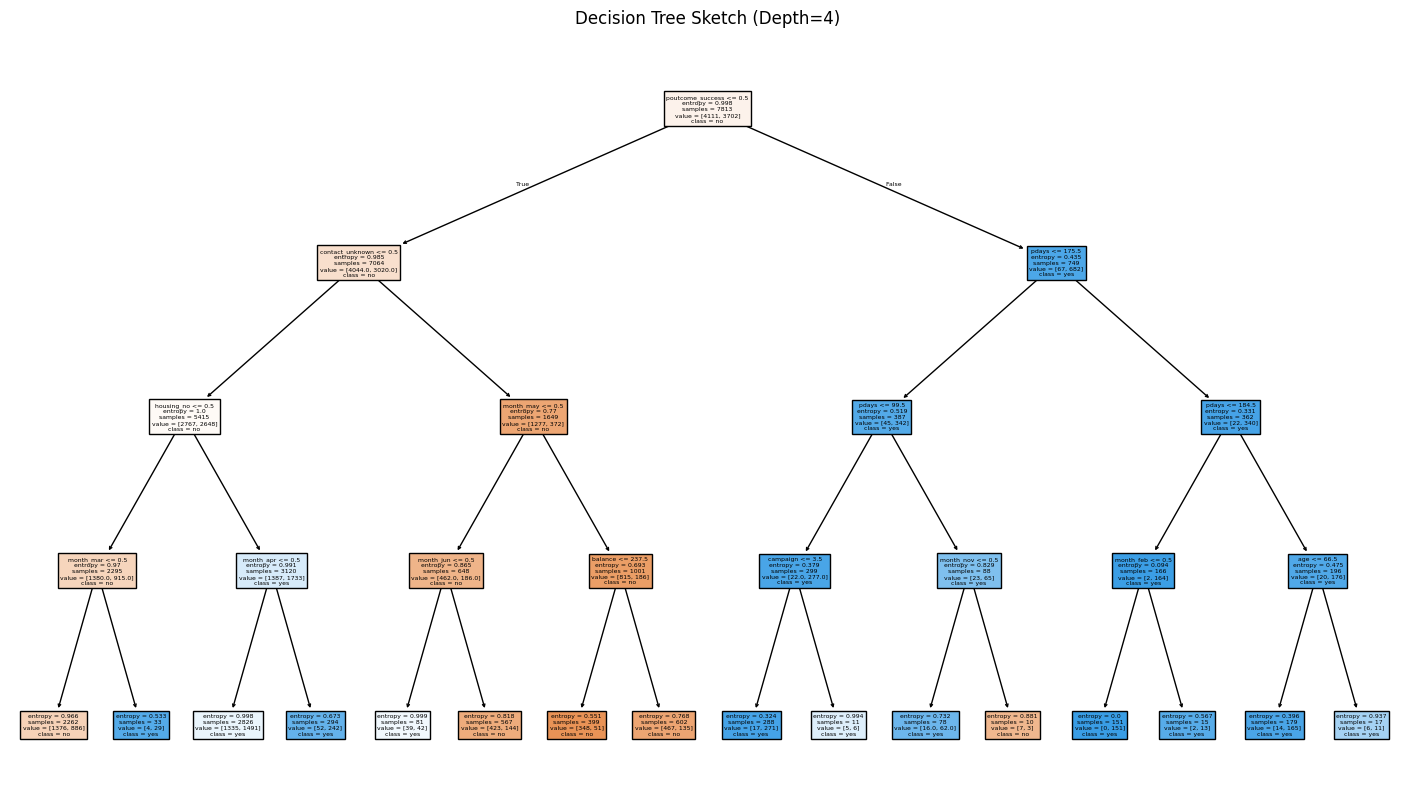


Summary:
  criterion  accuracy   roc_auc    pr_auc
0      gini  0.622275  0.620631  0.550542
1   entropy  0.627650  0.626615  0.554769
2  log_loss  0.627650  0.626615  0.554769


In [5]:

# ============================
# Bank Marketing: EDA + Preprocessing + Decision Trees
# ============================

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
)

# --- Config ---
FILE_NAME = "bank.csv"
RANDOM_STATE = 42
TEST_SIZE = 0.3
USE_DURATION = False

# --- Load ---
df = pd.read_csv(FILE_NAME)
print("Shape:", df.shape)
display(df.head())

# --- Target column ---
target_col = "y" if "y" in df.columns else "deposit"

# --- EDA ---
print("\nInfo:")
print(df.info())
print("\nMissing values:")
print(df.isna().sum())

# Target distribution
plt.figure(figsize=(5,4))
df[target_col].value_counts().plot(kind="bar", color=["#0ea5e9","#f59e0b"])
plt.title("Target Distribution")
plt.show()

# Drop 'duration' if USE_DURATION=False
if not USE_DURATION and "duration" in df.columns:
    df.drop(columns=["duration"], inplace=True)

# Encode target
y = df[target_col].map({"yes":1,"no":0}) if df[target_col].dtype == "object" else df[target_col]
X = df.drop(columns=[target_col])

# Identify numeric & categorical
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include=["object","category"]).columns.tolist()

print("\nNumeric:", num_cols)
print("Categorical:", cat_cols)

# --- Preprocessing ---
preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols)
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y)

X_train_proc = preprocess.fit_transform(X_train)
X_test_proc = preprocess.transform(X_test)

feature_names = num_cols + list(preprocess.named_transformers_["cat"].get_feature_names_out(cat_cols))

# --- Decision Trees ---
criteria = ["gini", "entropy"]
try:
    DecisionTreeClassifier(criterion="log_loss")
    criteria.append("log_loss")
except:
    print("Log-loss not supported in this version.")

results = []
trained_models = {}

for crit in criteria:
    clf = DecisionTreeClassifier(criterion=crit, random_state=RANDOM_STATE)
    clf.fit(X_train_proc, y_train)
    y_pred = clf.predict(X_test_proc)
    y_proba = clf.predict_proba(X_test_proc)[:,1]

    acc = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    pr_auc = average_precision_score(y_test, y_proba)

    print(f"\n=== {crit.upper()} ===")
    print(f"Accuracy: {acc:.4f}, ROC-AUC: {roc_auc:.4f}, PR-AUC: {pr_auc:.4f}")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {crit}")
    plt.show()

    results.append({"criterion":crit,"accuracy":acc,"roc_auc":roc_auc,"pr_auc":pr_auc})
    trained_models[crit] = clf

# --- Feature Importance ---
clf_ref = trained_models["entropy"]
importances = pd.Series(clf_ref.feature_importances_, index=feature_names).sort_values(ascending=False)
print("\nTop 15 Features:")
print(importances.head(15))

plt.figure(figsize=(10,6))
sns.barplot(x=importances.head(15), y=importances.head(15).index, color="#60a5fa")
plt.title("Top 15 Feature Importances")
plt.show()

# --- Interpretation Sketch (Shallow Tree) ---
clf_shallow = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=RANDOM_STATE)
clf_shallow.fit(X_train_proc, y_train)

plt.figure(figsize=(18,10))
plot_tree(clf_shallow, feature_names=feature_names, class_names=["no","yes"], filled=True)
plt.title("Decision Tree Sketch (Depth=4)")
plt.show()

# --- Summary Table ---
summary_df = pd.DataFrame(results)
print("\nSummary:")
print(summary_df)
